# Blds indicators

Question: Exists any relation between the Microsoft AI buildings and selected indicators?

#### Import libs

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np


import geopandas as gpd
import numpy as np
import libpysal as lp





In [2]:
os.environ["R_HOME"] = r"C:\\Program Files\\R\\R-4.3.0"
os.environ["PATH"] = r"C:\\Program Files\\R\\R-4.3.0\\bin\\x64" + ";" + os.environ["R_HOME"]


In [3]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()




In [4]:
# %load_ext rpy2.ipython

#### Load Microsoft AI buildings data by region

In [5]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [6]:
def get_json_names():

    home_dir = os.getcwd()
    json_dir = os.path.join(home_dir, f"downloaded-data-json", "")

    # Construct the file pattern
    file_pattern = os.path.join(json_dir, '*.json')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
            for file_name in file_names]
    # print(names)
    # Print the names

    return names
    

json_names = get_json_names()
json_names


['blds_africa_states_18-23_ai',
 'blds_continent_data_18-23_ai',
 'blds_northamerica_states_18-23_ai',
 'blds_world_states_18-23_ai',
 'roads_africa_states_18-23_ai',
 'roads_asia_states_18-23_ai',
 'roads_continent_data_18-23_ai',
 'roads_europe_states_18-23_ai',
 'roads_geojson-world-states']

In [7]:
json_dic = {k: v for k, v in enumerate(json_names)}
json_dic


{0: 'blds_africa_states_18-23_ai',
 1: 'blds_continent_data_18-23_ai',
 2: 'blds_northamerica_states_18-23_ai',
 3: 'blds_world_states_18-23_ai',
 4: 'roads_africa_states_18-23_ai',
 5: 'roads_asia_states_18-23_ai',
 6: 'roads_continent_data_18-23_ai',
 7: 'roads_europe_states_18-23_ai',
 8: 'roads_geojson-world-states'}

In [8]:
# define the user input

while True:
    if bool(json_dic):
        try:
            user_d_spec = int(input(f"Which data do you want to process?\
                                Enter {json_dic}"
                                    ))
        except ValueError:
            print("Please enter a number.")
            continue
        if user_d_spec not in range(len(json_dic)):
            print(f"Please enter {len(json_dic.keys())}")
            continue
        break
    else:
        print("Geojson_dic is empty, restart the kernel, please.")
        break



In [9]:
def data_spec(data_dic):

    try:
        with open(f"downloaded-data-json\\{data_dic}.json", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

data = data_spec(json_dic[user_d_spec])
data


[[{'groupByObject': ['Indonesia',
    'remainder',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
    1119190,
    2019,
    '4. Emerging region: MIKT',
    '4. Lower middle income',
    'Asia',
    'Asia',
    'South-Eastern Asia',
    'East Asia & Pacific'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 11987966.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 24924151.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 26423299.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 30570946.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 36251876.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 38586511.0}]},
  {'groupByObject': ['Indonesia',
    'source=microsoft/BuildingFootprints',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
   

In [10]:
header_properties = ["name_en", "source", "adm0_iso", "sovereignt", "type_", "admin", "geounit", "name", "ne_id", "pop_est",
                     "pop_rank", "pop_year", "gdp_md", "gdp_year", "economy", "income_grp", "continent", "region_un", "subregion", "region_wb",
                     "timestamp", "value"]


In [11]:
d = {k: list() for k in header_properties}
d

{'name_en': [],
 'source': [],
 'adm0_iso': [],
 'sovereignt': [],
 'type_': [],
 'admin': [],
 'geounit': [],
 'name': [],
 'ne_id': [],
 'pop_est': [],
 'pop_rank': [],
 'pop_year': [],
 'gdp_md': [],
 'gdp_year': [],
 'economy': [],
 'income_grp': [],
 'continent': [],
 'region_un': [],
 'subregion': [],
 'region_wb': [],
 'timestamp': [],
 'value': []}

In [12]:
"""
In this modified code, we check the length of the current list (d[key])
 against the length of the "timestamp" list (d["timestamp"]).
 If the current list is longer, we append the corresponding "timestamp"
 and "value" to ensure they have the same length. If the current list is shorter,
 we update the value at the corresponding index in the "timestamp" and "value" lists
 instead of appending new elements.
 
"""

for region in data:
    temp_dic = {}
    temp_keys = header_properties[0:-2]

    for dic in region:
        for idx, key in enumerate(temp_keys):
            temp_dic[key] = dic["groupByObject"][idx]

            for res in dic["result"]:
                if key not in d:
                    d[key] = []

                d[key].append(temp_dic[key])

                if len(d[key]) > len(d["timestamp"]):
                    d["timestamp"].append(res["timestamp"])
                    d["value"].append(res["value"])
                else:
                    d["timestamp"][len(d[key])-1] = res["timestamp"]
                    d["value"][len(d[key])-1] = res["value"]

df = pd.DataFrame(d)

In [13]:
df["blds_year"] = pd.to_datetime(df["timestamp"]).dt.year
df.rename(columns={"value": "num_of_blds"}, inplace=True)

In [14]:
df.dtypes


name_en         object
source          object
adm0_iso        object
sovereignt      object
type_           object
admin           object
geounit         object
name            object
ne_id            int64
pop_est        float64
pop_rank         int64
pop_year         int64
gdp_md           int64
gdp_year         int64
economy         object
income_grp      object
continent       object
region_un       object
subregion       object
region_wb       object
timestamp       object
num_of_blds    float64
blds_year        int64
dtype: object

In [15]:
sel_cols = ["name_en", "source", "adm0_iso", "pop_est",
            "gdp_md", "economy", "income_grp", "continent",
            "num_of_blds", "blds_year"]


In [16]:
df = df.loc[(df["blds_year"] == 2023) &
       ((df["source"] == "source=esri/Google_Africa_Buildings") |
        (df["source"] == "source=microsoft/BuildingFootprints")), sel_cols]\
              .groupby(["name_en", "adm0_iso"], as_index=False)[["pop_est", "gdp_md","num_of_blds"]].sum()

df

,name_en,adm0_iso,pop_est,gdp_md,num_of_blds
0,Abkhazia,GEO,490492.0,1000,360.0
1,Afghanistan,AFG,76083508.0,38582,2130.0
2,Albania,ALB,5708382.0,30558,7662.0
3,Algeria,DZA,86106108.0,342182,539.0
4,Andorra,AND,154284.0,6308,0.0
...,...,...,...,...,...
204,Wake Island,-99,200.0,0,0.0
205,Western Sahara,B28,1206506.0,1814,0.0
206,Yemen,YEM,58323844.0,45162,70.0
207,Zambia,ZMB,35722060.0,46618,159932.0


In [17]:
# df.loc[(df["name_en"] == "Nigeria") &
#        ((df["source"] == "source=esri/Google_Africa_Buildings") |
#         (df["source"] == "source=microsoft/BuildingFootprints")),
#        sel_cols].groupby(["name_en", "source"]).sum()


In [18]:
# df = df.loc[(df["continent"] == "Africa") &\
#            ((df["source"] == "source=esri/Google_Africa_Buildings") |
#            (df["source"] == "source=microsoft/BuildingFootprints")),
#            sel_cols]


In [19]:
# df_sel = df.groupby(["blds_year", "name_en", "adm0_iso"], as_index=False)[["num_of_blds", "gdp_md", "pop_est"]].sum()
# df_sel

In [20]:
# sns.pairplot(df_sel, hue='num_of_blds')


#### Load the indicators data (xlsx files)

In [21]:
# merge df with region names based on IDs
# df = df.merge(id_name_df, how="left", left_on="feature",
#                right_on="id")
# df.head(20)

In [22]:
# home_dir = os.getcwd()
indicators_dir = os.path.join(home_dir, f"indicators-data", "")


In [23]:
def get_indicators_names():

    home_dir = os.getcwd()
    indicators_dir = os.path.join(home_dir, f"indicators-data", "")

    # Construct the file pattern
    file_pattern = os.path.join(indicators_dir, '*.xlsx')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
             for file_name in file_names]
    # print(names)
    # Print the names

    return names


indicators_names = get_indicators_names()
indicators_names


['cellphone_usage',
 'disaster_deaths',
 'hdi_data',
 'parliament_women_absolute',
 'population']

In [24]:
cols = ["country", 2018, 2019, 2020, 2021, 2022, 2023]


In [25]:

files = glob.glob(indicators_dir + '*.xlsx')

cols = ["country", 2021, "year", "value", "iso"]
data = {}

for file in files:
   file_name = os.path.basename(file)  # Extract the file name with extension
   # Extract the file name without extension
   df_name = os.path.splitext(file_name)[0]
   try:
      df_xls = pd.read_excel(file, sheet_name="1")
      cols_intersection = list(set(df_xls.columns).intersection(cols))
      df_xls = df_xls[cols_intersection]
      data[df_name] = df_xls
   except:
      print(f"Error occured while reading {file_name}")


In [26]:
deaths = data["disaster_deaths"].loc[data["disaster_deaths"].year == 2021, :].groupby(["iso", 'country','year']).sum().rename(columns={"value": "deaths_2021"})
deaths


,,,deaths_2021
iso,country,year,
AFG,Afghanistan,2021,396.0
AGO,Angola,2021,22.0
ALB,Albania,2021,0.0
ARG,Argentina,2021,15.0
AUS,Australia,2021,7.0
...,...,...,...
VUT,Vanuatu,2021,0.0
YEM,Yemen,2021,89.0
ZAF,South Africa,2021,58.0


In [27]:
hdi = data['hdi_data'].rename(columns={2021: 'hdi_2021'})
hdi

,iso,hdi_2021,country
0,AFG,0.478,Afghanistan
1,ALB,0.796,Albania
2,DZA,0.745,Algeria
3,AND,0.858,Andorra
4,AGO,0.586,Angola
...,...,...,...
182,VEN,0.691,Venezuela
183,VNM,0.703,Vietnam
184,YEM,0.455,Yemen
185,ZMB,0.565,Zambia


In [28]:
population = data['population'].rename(columns={2021: "pop_2021"})
population


,iso,pop_2021,country
0,AFG,40099462,Afghanistan
1,ALB,2811666,Albania
2,DZA,44177969,Algeria
3,ASM,45035,American Samoa
4,AND,79034,Andorra
...,...,...,...
261,SSF,1181162739,Sub-Saharan Africa
262,SSA,1181063481,Sub-Saharan Africa (excluding high income)
263,TSS,1181162739,Sub-Saharan Africa (IDA & IBRD countries)
264,UMC,2503136362,Upper middle income


In [29]:
m_df_pop = pd.merge(df, population, how="left", left_on=[
         "adm0_iso"], right_on=["iso"])
m_df_pop_hdi = pd.merge(m_df_pop, hdi, how="left", left_on=[
         "adm0_iso"], right_on=["iso"])
m_df_pop_hdi_deaths = pd.merge(m_df_pop_hdi, deaths, how="left", left_on=[
    "adm0_iso"], right_on=["iso"])


In [30]:
merged_df = m_df_pop_hdi_deaths.drop(
    ['iso_x', 'country_x', 'iso_y', 'country_y'], axis=1)
merged_df


,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021
0,Abkhazia,GEO,490492.0,1000,360.0,3708610,0.802,0.0
1,Afghanistan,AFG,76083508.0,38582,2130.0,40099462,0.478,396.0
2,Albania,ALB,5708382.0,30558,7662.0,2811666,0.796,0.0
3,Algeria,DZA,86106108.0,342182,539.0,44177969,0.745,134.0
4,Andorra,AND,154284.0,6308,0.0,79034,0.858,NaN
...,...,...,...,...,...,...,...,...
204,Wake Island,-99,200.0,0,0.0,NaN,NaN,NaN
205,Western Sahara,B28,1206506.0,1814,0.0,NaN,NaN,NaN
206,Yemen,YEM,58323844.0,45162,70.0,32981641,0.455,89.0
207,Zambia,ZMB,35722060.0,46618,159932.0,19473125,0.565,19.0


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [32]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


In [33]:
merged_df.dropna(inplace=True)


In [34]:
len(merged_df)


139

In [35]:
merged_df.columns

Index(['name_en', 'adm0_iso', 'pop_est', 'gdp_md', 'num_of_blds', 'pop_2021',
       'hdi_2021', 'deaths_2021'],
      dtype='object')

In [36]:
len(merged_df)

139

In [37]:
try:
    merged_df['gdp_md'] = merged_df['gdp_md'].astype(float)
    merged_df['num_of_blds'] = merged_df['num_of_blds'].astype(float)
    merged_df['pop_2021'] = merged_df['pop_2021'].astype(int)
    merged_df['hdi_2021'] = merged_df['hdi_2021'].astype(float)
    merged_df['deaths_2021'] = merged_df['deaths_2021'].astype(float)
except:
    print("Error occured while converting data types")


In [38]:
columns = [ 'gdp_md', 'num_of_blds', 'pop_2021',
           'hdi_2021', 'deaths_2021']
merged_df[columns].columns

Index(['gdp_md', 'num_of_blds', 'pop_2021', 'hdi_2021', 'deaths_2021'], dtype='object')

gdp_md         6.962584
num_of_blds    4.671193
pop_2021       3.294251
hdi_2021       1.179289
deaths_2021    1.572167
Name: VIF, dtype: float64

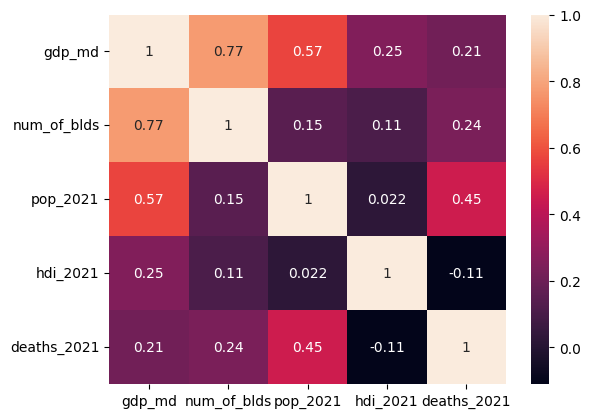

<Figure size 500x500 with 0 Axes>

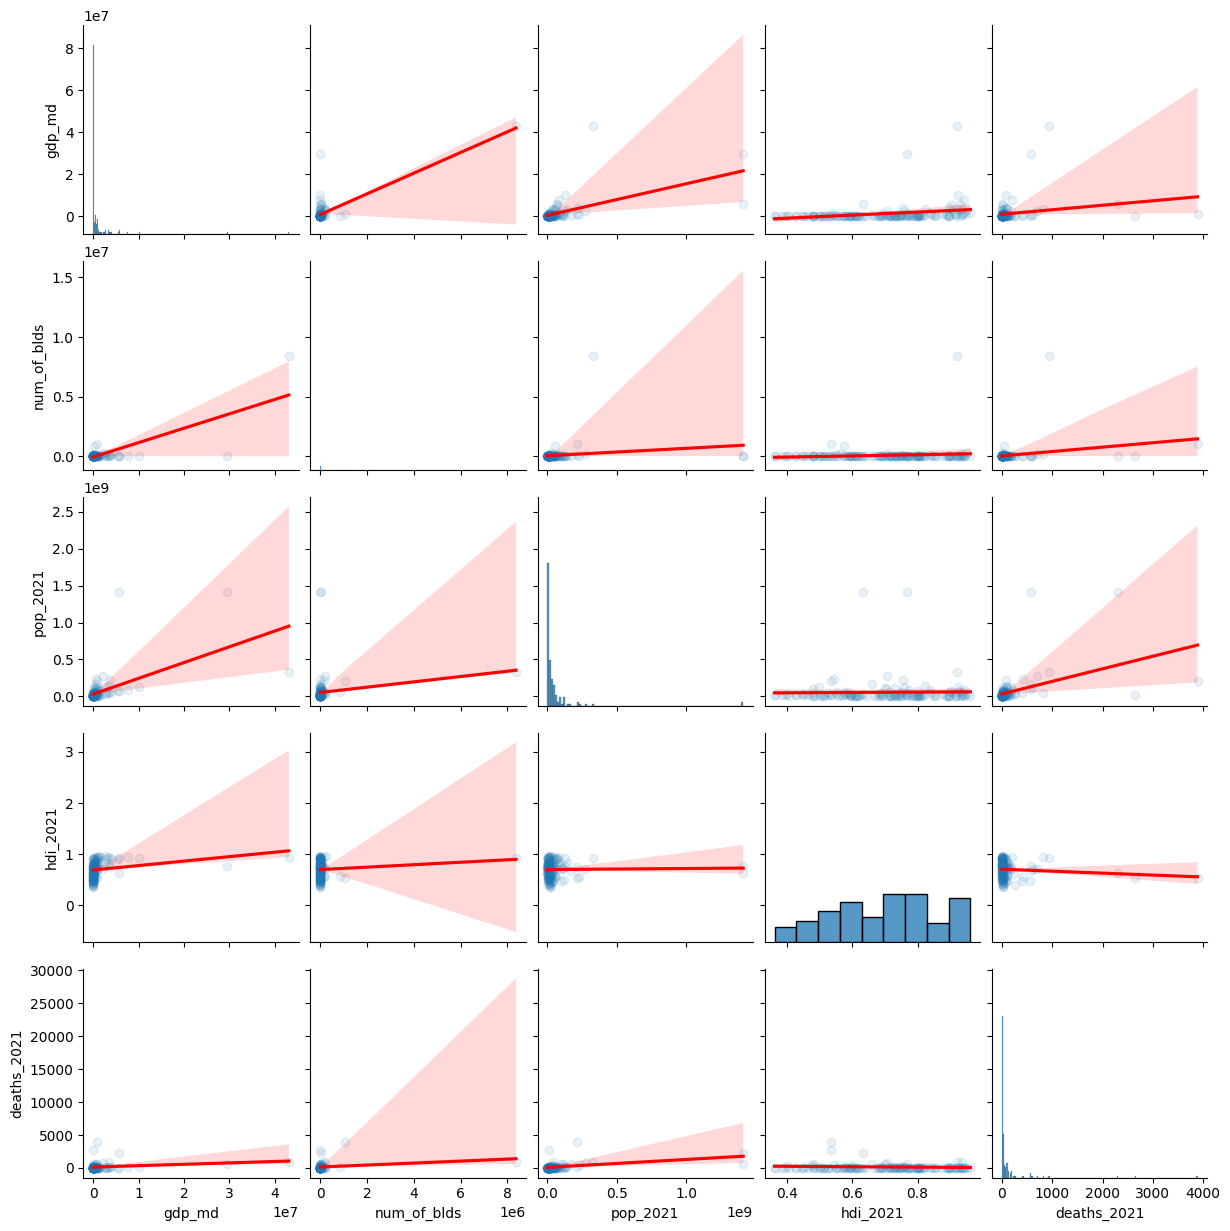

In [39]:


vifs = pd.Series(np.linalg.inv(merged_df[columns].corr().to_numpy()).diagonal(),
                 index=merged_df[columns].columns,
                 name='VIF')
display(vifs)

corrMatrix = merged_df[columns].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

w, v = np.linalg.eig(corrMatrix)

plt.figure(figsize=(5, 5))
sns.pairplot(
    merged_df[columns],
    kind='reg',
    plot_kws={
        'line_kws': {'color': 'red'},
        'scatter_kws': {'alpha': 0.1}
    }
)
plt.show()


In [40]:
merged_df

,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021
0,Abkhazia,GEO,490492.0,1000.0,360.0,3708610,0.802,0.0
1,Afghanistan,AFG,76083508.0,38582.0,2130.0,40099462,0.478,396.0
2,Albania,ALB,5708382.0,30558.0,7662.0,2811666,0.796,0.0
3,Algeria,DZA,86106108.0,342182.0,539.0,44177969,0.745,134.0
5,Angola,AGO,63650590.0,177630.0,513.0,34503774,0.586,22.0
...,...,...,...,...,...,...,...,...
202,Venezuela,VEN,57031658.0,964718.0,27477.0,28199867,0.691,46.0
203,Vietnam,VNM,192924212.0,523842.0,69.0,97468029,0.703,35.0
206,Yemen,YEM,58323844.0,45162.0,70.0,32981641,0.455,89.0
207,Zambia,ZMB,35722060.0,46618.0,159932.0,19473125,0.565,19.0


## Normalize data
Use the mean and the standard deviation to normalize the data. This has been applied at the very beginning.

In [41]:
columns = ["num_of_blds",
           "gdp_md", "pop_2021", "hdi_2021", "deaths_2021",
           ]

for column in columns:
    print(column)
    merged_df[f"{column}_norm"] = (merged_df[column] - merged_df[column].min())/(merged_df[column].max() - merged_df[column].min())
        # (merged_df[column] - merged_df[column].mean())/merged_df[column].std()
        # (merged_df[column] - merged_df[column].min())/(merged_df[column].max() - merged_df[column].min())
        

display(merged_df)
# df.to_csv("data/normalized_data.csv")


num_of_blds
gdp_md
pop_2021
hdi_2021
deaths_2021


,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021,num_of_blds_norm,gdp_md_norm,pop_2021_norm,hdi_2021_norm,deaths_2021_norm
0,Abkhazia,GEO,490492.0,1000.0,360.0,3708610,0.802,0.0,0.000043,0.000021,0.002618,0.733777,0.000000
1,Afghanistan,AFG,76083508.0,38582.0,2130.0,40099462,0.478,396.0,0.000255,0.000893,0.028384,0.194676,0.101931
2,Albania,ALB,5708382.0,30558.0,7662.0,2811666,0.796,0.0,0.000916,0.000707,0.001983,0.723794,0.000000
3,Algeria,DZA,86106108.0,342182.0,539.0,44177969,0.745,134.0,0.000064,0.007940,0.031272,0.638935,0.034492
5,Angola,AGO,63650590.0,177630.0,513.0,34503774,0.586,22.0,0.000061,0.004121,0.024422,0.374376,0.005663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Venezuela,VEN,57031658.0,964718.0,27477.0,28199867,0.691,46.0,0.003284,0.022389,0.019959,0.549085,0.011840
203,Vietnam,VNM,192924212.0,523842.0,69.0,97468029,0.703,35.0,0.000008,0.012156,0.069003,0.569052,0.009009
206,Yemen,YEM,58323844.0,45162.0,70.0,32981641,0.455,89.0,0.000008,0.001046,0.023344,0.156406,0.022909
207,Zambia,ZMB,35722060.0,46618.0,159932.0,19473125,0.565,19.0,0.019116,0.001080,0.013780,0.339434,0.004891


### Load Data and Define KNN Neighbourhood

In [42]:
geo_df = gpd.read_file(os.path.join(home_dir, "geojson-regions",
              "geojson-world-states.geojson"))


In [43]:
geo_df.columns

Index(['SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3',
       'GEOU_DIF', 'GEOUNIT', 'GU_A3',
       ...
       'LABEL_X', 'LABEL_Y', 'NE_ID', 'WIKIDATAID', 'NAME_DE', 'NAME_EN',
       'FCLASS_ISO', 'TLC_DIFF', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=110)

In [44]:
geo_cols = ["NAME_EN", "ADM0_ISO", "geometry"]
geo_df = geo_df[geo_cols]
geo_df


,NAME_EN,ADM0_ISO,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...
204,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26..."
205,Wake Island,-99,"MULTIPOLYGON (((115.36720 10.23749, 115.36598 ..."
206,Bajo Nuevo Bank,-99,"MULTIPOLYGON (((-79.98929 15.79495, -79.98782 ..."
207,Serranilla Bank,-99,"MULTIPOLYGON (((-78.63707 15.86209, -78.64041 ..."


In [45]:
geo_df_stats = pd.merge(geo_df, merged_df, how="left", left_on=['ADM0_ISO'], right_on=['adm0_iso'])


In [46]:
os.getcwd()

'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats'

In [47]:
geo_df_stats


,NAME_EN,ADM0_ISO,geometry,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021,num_of_blds_norm,gdp_md_norm,pop_2021_norm,hdi_2021_norm,deaths_2021_norm
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,541251136.0,2238380.0,203216.0,273753191.0,0.705,696.0,0.024289,0.051950,0.193820,0.572379,0.179151
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,63899554.0,729362.0,11160.0,33573874.0,0.803,117.0,0.001334,0.016926,0.023764,0.735441,0.030116
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,37904076.0,564636.0,1361.0,19493184.0,0.855,0.0,0.000163,0.013103,0.013794,0.821963,0.000000
3,Bolivia,BOL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Bolivia,BOL,23026200.0,81790.0,8063.0,12079472.0,0.692,127.0,0.000964,0.001896,0.008545,0.550749,0.032690
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,65020906.0,453696.0,128.0,33715471.0,0.762,103.0,0.000015,0.010528,0.023864,0.667221,0.026512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Wake Island,-99,"MULTIPOLYGON (((115.36720 10.23749, 115.36598 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,Bajo Nuevo Bank,-99,"MULTIPOLYGON (((-79.98929 15.79495, -79.98782 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Serranilla Bank,-99,"MULTIPOLYGON (((-78.63707 15.86209, -78.64041 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
geo_df_stats.to_file('notebooks-glm-eigen-vector-mapping-blds/geo_df_stats_norm.geojson', driver='GeoJSON')

# R Workflow
### Load Data and Define KNN Neighbourhood

In [49]:
ro.r(f'''

# install.packages("dplyr")
# install.packages("tidyr")
# install.packages("sf")
# install.packages("spdep")
# install.packages("reticulate")
# install.packages("sp")
# install.packages("lwgeom")
# install.packages("spatialreg")
# install.packages("openxlsx")

''')


<rpy2.rinterface_lib.sexp.NULLType object at 0x000001C60DDE4940> [RTYPES.NILSXP]

In [50]:
ro.r(f'''

library(magrittr)
library(dplyr)
library(tidyr)
library(sf)
library(spdep)
library(reticulate)
library(sp)
library(lwgeom)
library(spatialreg)
library(openxlsx)

''')


R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: 'tidyr'


R[write to console]: The following object is masked from 'package:magrittr':

    extract


R[write to console]: Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE

R[write to console]: Loading required package: spData

R[write to console]: To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`




    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Linking to liblwgeom 3.0.0beta1 r16016, GEOS 3.11.2, PROJ 9.2.0

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'Matrix'


R[write to console]: The following objects are masked from 'package:tidyr':

    expand, pack, unpack


R[write to console]: 
Attaching package: 'spatialreg'


R[write to console]: The following objects are masked from 'package:spdep':

    get.ClusterOption, get.coresOption, get.mcOption,
    get.VerboseOption, get.ZeroPolicyOption, set.ClusterOption,
    set.coresOption, set.mcOption, set.VerboseOption,
    set.ZeroPolicyOption




In [51]:
# with (ro.default_converter + pandas2ri.converter).context():
#   r_from_pd_df = ro.conversion.get_conversion().py2rpy(geo_df_stats)

# r_from_pd_df


In [52]:
# ro.r(f'''

# # datSf <- st_read()

# # datSf <- st_as_sf({geo_df_stats}, coords = c({geo_df_stats.geometry[0]}, {geo_df_stats.geometry[1]}), crs = 4326)

# # r_dataframe = pandas2ri.py2ri({geo_df_stats})
# # print(r_dataframe))
# ??st_as_sf.data.frame

# ''')


In [53]:
# ro.r(f'''

# sf_use_s2(FALSE)

# # datSf <- st_read("notebooks-glm-eigen-vector-mapping/geo_df_stats.geojson")
# datSf <- st_read("notebooks-glm-eigen-vector-mapping/geo_df_stats_norm.geojson")

# st_is_valid(datSf)

# # Remove duplicate geometries
# datSf <- datSf[!duplicated(datSf), ]

# # Handle missing values
# datSf <- datSf %>%
#   mutate(
#     gdp_md = ifelse(is.na(gdp_md), 0, gdp_md),
#     num_of_blds = ifelse(is.na(num_of_blds), 0, num_of_blds),
#     pop_2021 = ifelse(is.na(pop_2021), 0, pop_2021),
#     hdi_2021 = ifelse(is.na(hdi_2021), 0, hdi_2021),
#     deaths_2021 = ifelse(is.na(deaths_2021), 0, deaths_2021)
#   )

# # Check for empty geometries
# datSf <- datSf[!st_is_empty(datSf), , drop = FALSE]

# datSp <- as_Spatial(datSf)

# coords <- st_centroid(st_geometry(datSf), of_largest_polygon = TRUE)

# dat.nbk10 <- knn2nb(knearneigh(coords, k = 10))
# dat.lwk10 <- nb2listw(dat.nbk10, style = "W")


# ''')


In [54]:
# ro.r(f'''

# sf_use_s2(FALSE)

# # datSf <- st_read("notebooks-glm-eigen-vector-mapping-blds/geo_df_stats.geojson")
# datSf <- st_read("notebooks-glm-eigen-vector-mapping-blds/geo_df_stats_norm.geojson")

# st_is_valid(datSf)

# # Remove duplicate geometries
# datSf <- datSf[!duplicated(datSf), ]

# # Handle missing values
# datSf <- datSf %>%
#   mutate(
#     gdp_md = ifelse(is.na(gdp_md), 0, gdp_md),
#     num_of_blds = ifelse(is.na(num_of_blds), 0, num_of_blds),
#     pop_2021 = ifelse(is.na(pop_2021), 0, pop_2021),
#     hdi_2021 = ifelse(is.na(hdi_2021), 0, hdi_2021),
#     deaths_2021 = ifelse(is.na(deaths_2021), 0, deaths_2021)
#   )

# # Check for empty geometries
# datSf <- datSf[!st_is_empty(datSf), , drop = FALSE]

# datSp <- as_Spatial(datSf)

# coords <- st_centroid(st_geometry(datSf), of_largest_polygon = TRUE)

# dat.nbk10 <- knn2nb(knearneigh(coords, k = 10))
# dat.lwk10 <- nb2listw(dat.nbk10, style = "W")


# ''')


In [55]:
ro.r(f'''

sf_use_s2(FALSE)

# datSf <- st_read("notebooks-glm-eigen-vector-mapping-blds/geo_df_stats.geojson")
datSf <- st_read("notebooks-glm-eigen-vector-mapping-blds/geo_df_stats_norm.geojson")

st_is_valid(datSf)

# Remove duplicate geometries
datSf <- datSf[!duplicated(datSf), ]

datSf <- datSf %>% distinct(.keep_all = TRUE)
names(datSf)

# Handle missing values
datSf <- datSf %>% replace_na(list(
    gdp_md_norm = 0,
    num_of_blds_norm = 0,
    pop_2021_norm = 0,
    hdi_2021_norm = 0,
    deaths_2021_norm = 0
    
    )
)

# Check for empty geometries
datSf <- datSf[!st_is_empty(datSf), , drop = FALSE]

datSp <- as_Spatial(datSf)

coords <- st_centroid(st_geometry(datSf), of_largest_polygon = TRUE)

dat.nbk10 <- knn2nb(knearneigh(coords, k = 10))
dat.lwk10 <- nb2listw(dat.nbk10, style = "W")


''')


R[write to console]: Spherical geometry (s2) switched off



Reading layer `geo_df_stats_norm' from data source 
  `C:\Users\milan\OneDrive - MUNI\VŠ\PhD\Zahraniční stáž\Work\HeiGIT_notebooks\analysis\ai-assisted-osm-mapping-stats\notebooks-glm-eigen-vector-mapping-blds\geo_df_stats_norm.geojson' 
  using driver `GeoJSON'
Simple feature collection with 219 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -90 xmax: 180 ymax: 83.6341
Geodetic CRS:  WGS 84


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_centroid.sfc(st_geometry(datSf), of_largest_polygon = TRUE) :
R[write to console]: 
 
R[write to console]:  st_centroid does not give correct centroids for longitude/latitude data

R[write to console]: 2: 
R[write to console]: In knearneigh(coords, k = 10) :
R[write to console]:  knearneigh: identical points found

R[write to console]: 3: 
R[write to console]: In knearneigh(coords, k = 10) :
R[write to console]: 
 
R[write to console]:  knearneigh: kd_tree not available for identical points



In [56]:
ro.r(f'''

print(dat.lwk10)

''')


Characteristics of weights list object:
Neighbour list object:
Number of regions: 219 
Number of nonzero links: 2190 
Percentage nonzero weights: 4.56621 
Average number of links: 10 
Non-symmetric neighbours list

Weights style: W 
Weights constants summary:
    n    nn  S0    S1     S2
W 219 47961 219 38.22 906.58


In [57]:
ro.r(f'''

# print(names(datSf))
# print(names(datSp))
sum(is.na(datSf))

''')


560


### Model with added Covariates
This model uses the following variables:
* gdp_md
* pop_2021
* hdi_2021 (SHDI (Social Human Development Index))
* gender_equality (share of women in parliament)
* deaths_2021

In [58]:

# out = ro.r(f'''
# sevm_B <- spatialreg::ME(
#     num_of_blds ~

#         gdp_md +
#         pop_2021 +
#         hdi_2021 +
#         deaths_2021,
#     family=poisson,
#     data=datSp,
#     listw =dat.lwk10,
#     alpha = 0.05
# )
# sevm_Bqp <- spatialreg::ME(
#     num_of_blds ~

#         gdp_md +
#         pop_2021 +
#         hdi_2021 +
#         deaths_2021,
#     family=quasipoisson,
#     data=datSp,
#     listw =dat.lwk10,
#     alpha = 0.05
# )
# g_poisBqp_sevm <- glm(
#         num_of_blds ~

#         gdp_md +
#         pop_2021 +
#         hdi_2021 +
#         deaths_2021,
#     family = quasipoisson,
#     data = datSf,
# )
# datSf$resid_ai_blds <- residuals(g_poisBqp_sevm)
# summary(g_poisBqp_sevm)
# ''')
# # print(column)
# print(out)

# out = ro.r(f'''
# 1 - g_poisBqp_sevm$deviance / g_poisBqp_sevm$null.deviance
# ''')
# print(out)
# print("""
# ######################################################################
# """)

# # out = ro.r(f"""
# #     write.csv(datSf, "notebooks-glm-eigen-vector-mapping/glm_results_and_residuals.csv")
# # """)


In [59]:
out = ro.r(f'''

# datSf$num_of_blds_norm <- round(datSf$num_of_blds_norm)
# datSp$num_of_blds_norm <- round(datSp$num_of_blds_norm)

sevm_B <- spatialreg::ME(
    num_of_blds ~

        gdp_md_norm +
        pop_2021_norm +
        hdi_2021_norm +
        deaths_2021_norm,
    family=poisson,
    data=datSp,
    listw =dat.lwk10
)
sevm_Bqp <- spatialreg::ME(
    num_of_blds ~

        gdp_md_norm +
        pop_2021_norm +
        hdi_2021_norm +
        deaths_2021_norm,
    family=quasipoisson,
    data=datSp,
    listw =dat.lwk10
)
g_poisBqp_sevm <- glm(
        num_of_blds ~

        gdp_md_norm +
        pop_2021_norm +
        hdi_2021_norm +
        deaths_2021_norm,
    family = quasipoisson,
    data = datSf,
)
datSf$resid_ai_blds <- residuals(g_poisBqp_sevm)
summary(g_poisBqp_sevm)

# # Call the warnings() function
# warning_messages <- warnings()

# # Print the warning messages
# print(warning_messages)
''')
# print(column)
print(out)

out = ro.r(f'''
1 - g_poisBqp_sevm$deviance / g_poisBqp_sevm$null.deviance
''')
print(out)
print("""
######################################################################
""")

# out = ro.r(f"""
#     write.csv(datSf, "notebooks-glm-eigen-vector-mapping/glm_results_and_residuals.csv")
# """)


R[write to console]: Error in spatialreg::ME(num_of_blds ~ gdp_md_norm + pop_2021_norm + hdi_2021_norm +  : 
  base correlation larger than alpha



RRuntimeError: Error in spatialreg::ME(num_of_blds ~ gdp_md_norm + pop_2021_norm + hdi_2021_norm +  : 
  base correlation larger than alpha


In [ ]:
# # export to excel

# ro.r(f'''

# # d <- data.frame(datSf)
# # class(d)
# # str(d)

# # Convert sf dataframe to regular dataframe
# df <- st_drop_geometry(datSf)

# # Extract attributes from the sf object
# # df <- as.data.frame(datSf)

# # Remove the geometry column
# # df$geometry <- NULL

# # openxlsx::write.xlsx(df, "notebooks-glm-eigen-vector-mapping/glm_results_and_residuals.xlsx")





# ''')


#### Not needed – Melt & merge the data with indicators

In [ ]:
df_i = data['GDL-Subnational-HDI-data']
# df_str_cols = map(lambda x: str(x), df.columns)
cols_intersection = list(set(df_i.columns).intersection(cols))
cols_intersection

KeyError: 'GDL-Subnational-HDI-data'

In [ ]:
data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population', 'YouthMappersChapters-List'])

In [ ]:
df_to_melt = ['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population']


In [ ]:
data["parliament-women-absolute"]


,country,year,value
0,Afghanistan,2018,69.0
1,Afghanistan,2020,67.0
2,Afghanistan,2021,67.0
3,Afghanistan,2022,67.0
4,Afghanistan,2023,NaN
...,...,...,...
1401,Zimbabwe,2019,86.0
1402,Zimbabwe,2020,86.0
1403,Zimbabwe,2021,86.0
1404,Zimbabwe,2022,81.0


In [ ]:
data["disaster_deaths"]


,country,year,value
0,France,2018,6.0
1,Albania,2018,NaN
2,Brazil,2018,4.0
3,Cuba,2018,9.0
4,Brazil,2018,49.0
...,...,...,...
2923,Zambia,2023,NaN
2924,Zambia,2023,2.0
2925,Zimbabwe,2023,NaN
2926,Serbia,2023,2.0


In [ ]:
melted_data = {}

for df_name in df_to_melt:
    df = data[df_name]
    df = df.melt(id_vars="country", var_name="year", value_name="value")
    melted_data[df_name] = df

In [ ]:
melted_data.keys()

dict_keys(['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population'])

In [ ]:
melted_data["world-state-population"]


,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [ ]:
data['YouthMappersChapters-List']


""
0
1
2
3
4
...
365
366
367
368


In [ ]:
df_i = df_i.loc[:, cols_intersection]

In [ ]:


# Reshape the dataframe using melt
df_i = df_i.melt(id_vars='country', var_name='year', value_name='value')

df_i.head(10)


,country,year,value
0,Afghanistan,2018,0.483
1,Albania,2018,0.806
2,Algeria,2018,0.745
3,Andorra,2018,0.872
4,Angola,2018,0.595
5,Antigua and Barbuda,2018,0.798
6,Argentina urban,2018,0.850
7,Armenia,2018,0.771
8,Australia,2018,0.941
9,Austria,2018,0.917


In [ ]:
data.update(melted_data)
form_data = data
del form_data['YouthMappersChapters-List']



In [ ]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
df_i

,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [ ]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [ ]:
form_data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
# # Define the common column(s) to merge on
# merge_column = ['country', 'year']

# # Merge DataFrames from the dictionary based on the specified column(s)
# merged_df = pd.DataFrame()
# for key, df in form_data.items():
#     if merged_df.empty:
#         merged_df = df
#     else:
#         merged_df = pd.merge(merged_df, df, on=merge_column, how='outer')


In [ ]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
df.rename(columns={"name": "country"}, inplace=True)


In [ ]:
df

,feature,source,timestamp,value,year,id,country
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [ ]:
pd.merge(df, form_data['disaster_deaths'],
         on=["country", "year"], how="inner")


,feature,source,timestamp,value_x,year,id,country,value_y
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,32.0
1,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,12.0
2,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,NaN
3,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,18.0
4,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,0,Ethiopia,32.0
...,...,...,...,...,...,...,...,...
1155,7,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,7,Morocco,21.0
1156,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1157,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1158,7,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,49025.0,2023,7,Morocco,11.0


In [ ]:
merged_data = {}
test_df = pd.DataFrame()

for key, df_i in form_data.items():
    # df_i = form_data[df_name]
    df = pd.merge(df, df_i, on=["country", "year"], how="left", suffixes=("", "_" + key))
    
    

    

In [ ]:
sel_cols = list(df.columns[7:])
sel_cols

['value_cellphone-usage',
 'value_disaster_deaths',
 'value_GDL-Subnational-HDI-data',
 'value_parliament-women-absolute',
 'value_parliament-women-percentage',
 'value_world-state-population']

In [ ]:
# Select columns where rows equal '..' and replace with NaN
selected_columns = df.loc[df.eq('..').any(axis=1)]
df[selected_columns.columns] = selected_columns.replace('..', np.nan)


In [ ]:
my_df = df.loc[(df["source"] == "source=microsoft/BuildingFootprints"), sel_cols + ["value"]]
my_df


,value_cellphone-usage,value_disaster_deaths,value_GDL-Subnational-HDI-data,value_parliament-women-absolute,value_parliament-women-percentage,value_world-state-population,value
21,NaN,32.0,0.489,212.0,38.76,111129438.0,0.0
22,NaN,12.0,0.489,212.0,38.76,111129438.0,0.0
23,NaN,NaN,0.489,212.0,38.76,111129438.0,0.0
24,NaN,18.0,0.489,212.0,38.76,111129438.0,0.0
38,NaN,31.0,NaN,195.0,41.49,NaN,0.0
...,...,...,...,...,...,...,...
1312,NaN,NaN,NaN,4.0,16.67,NaN,0.0
1348,NaN,NaN,NaN,NaN,NaN,NaN,201082.0
1395,NaN,43.0,NaN,95.0,24.05,NaN,0.0
1396,NaN,11.0,NaN,95.0,24.05,NaN,0.0


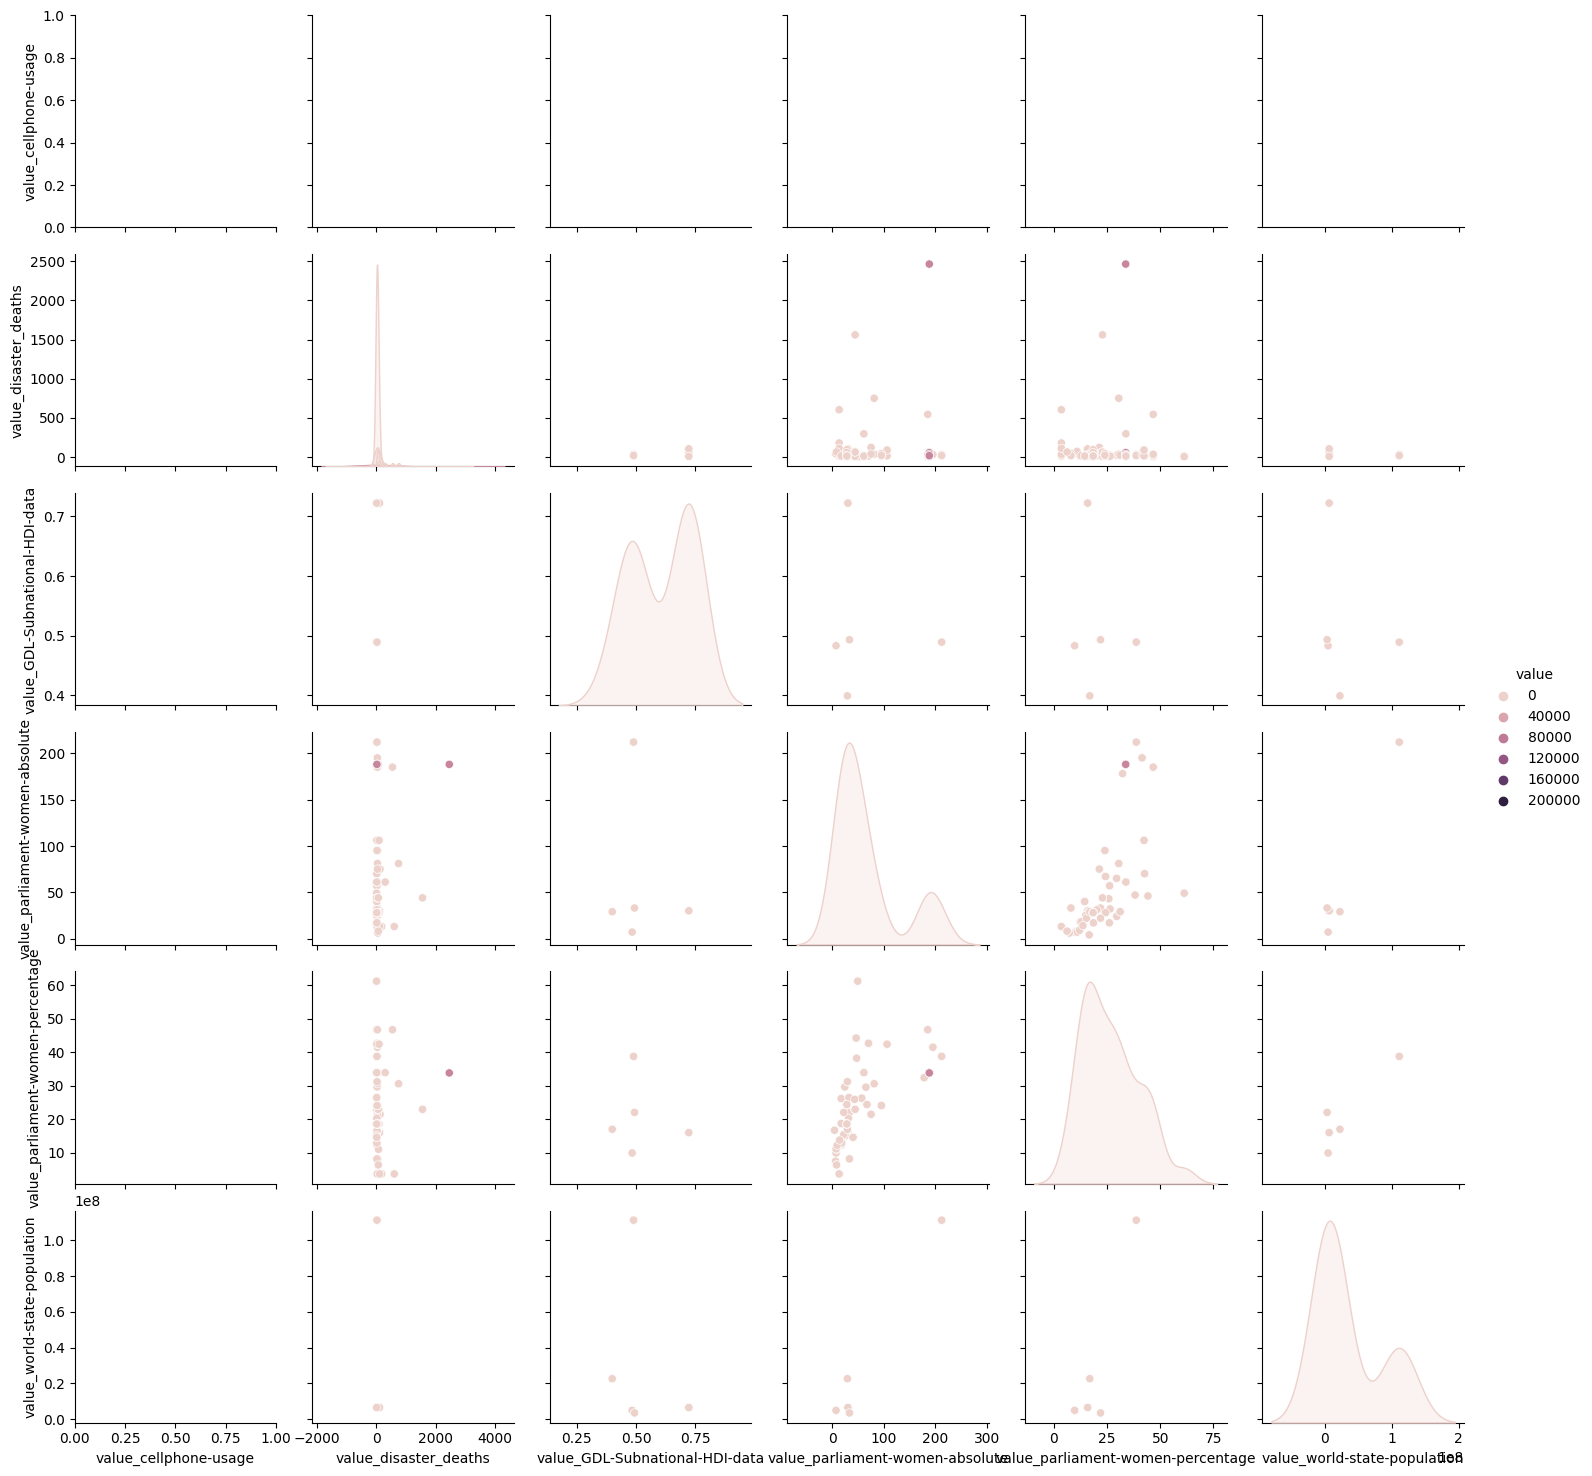

In [ ]:
sns.pairplot(my_df, hue='value')


In [ ]:
df = pd.merge(df, df_i, how="left", left_on=["name", "year"], right_on=["country", "year"])

KeyError: 'year'